<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/sklearn_regression_diabetetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

### https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [24]:
import matplotlib.pyplot as plt
from pylab import mpl, plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime as dt

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams["savefig.dpi"] = 500
np.set_printoptions(precision=5, suppress=True, formatter={"float": lambda x: f"{x:6.3f}"})

%matplotlib inline

In [6]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [7]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


In [25]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [14]:
type(regr.coef_)

numpy.ndarray

In [19]:
np.ndarray.round(regr.coef_,4)

array([938.2379])

In [21]:
# The coefficients
print("Coefficients: \n", np.ndarray.round(regr.coef_,4))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [938.2379]
Mean squared error: 2548.07
Coefficient of determination: 0.47


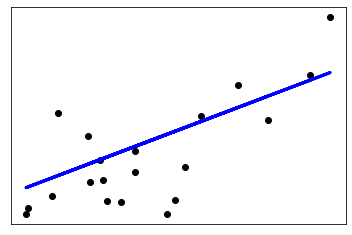

In [4]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [36]:
import statsmodels.api as sm

X_ols = sm.add_constant(diabetes_X_train)
model = sm.OLS(diabetes_y_train, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     211.7
Date:                Sun, 29 May 2022   Prob (F-statistic):           3.98e-39
Time:                        01:49:43   Log-Likelihood:                -2346.5
No. Observations:                 422   AIC:                             4697.
Df Residuals:                     420   BIC:                             4705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.9189      3.069     49.830      0.0

In [38]:
X_ols

array([[ 1.000,  0.062],
       [ 1.000, -0.051],
       [ 1.000,  0.044],
       [ 1.000, -0.012],
       [ 1.000, -0.036],
       [ 1.000, -0.041],
       [ 1.000, -0.047],
       [ 1.000, -0.002],
       [ 1.000,  0.062],
       [ 1.000,  0.039],
       [ 1.000, -0.084],
       [ 1.000,  0.018],
       [ 1.000, -0.029],
       [ 1.000, -0.002],
       [ 1.000, -0.026],
       [ 1.000, -0.018],
       [ 1.000,  0.042],
       [ 1.000,  0.012],
       [ 1.000, -0.011],
       [ 1.000, -0.018],
       [ 1.000, -0.057],
       [ 1.000, -0.022],
       [ 1.000, -0.004],
       [ 1.000,  0.061],
       [ 1.000,  0.036],
       [ 1.000, -0.013],
       [ 1.000, -0.077],
       [ 1.000,  0.060],
       [ 1.000, -0.021],
       [ 1.000, -0.006],
       [ 1.000,  0.044],
       [ 1.000, -0.065],
       [ 1.000,  0.125],
       [ 1.000, -0.050],
       [ 1.000, -0.063],
       [ 1.000, -0.031],
       [ 1.000,  0.023],
       [ 1.000,  0.011],
       [ 1.000,  0.071],
       [ 1.000,  0.014],


In [35]:
mod = sm.OLS(diabetes_y_train, sm.add_constant(diabetes_X_train))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     211.7
Date:                Sun, 29 May 2022   Prob (F-statistic):           3.98e-39
Time:                        01:49:37   Log-Likelihood:                -2346.5
No. Observations:                 422   AIC:                             4697.
Df Residuals:                     420   BIC:                             4705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.9189      3.069     49.830      0.0

In [39]:
import pandas as pd
beta=np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(diabetes_y_train))
pd.Series(beta)


0    152.918862
1    938.237861
dtype: float64